# Udacity: Programa Nanodegree - FDS I (Projeto II)
   # Análise exploratória dos dados (Titanic)
   # Aluno: Balbino S. Junior

### Projeto final Udacity

* A coluna survived é a variavel dependente
  - Survived

* Definindo as variáveis independentes
  - Sex
  - Age
  - Pclass
  - Fare

In [296]:
#Carregando as bibliotecas do Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
 

## Perguntas

* Tendo em vista a divisão dos passageiros por faixa etária (crianças, adultos e idosos). Existe uma relação entre a faixa 
  etária e o número de sobreviventes?
* A taxa de sobreviventes entre os passageiros da primeira classe foi maior?
* Qual a influência do sexo dos passageiros no número de sobreviventes?
* Qual a influência do perfil financeiro dos passageiros para a sua sobrevivência?

## Limpeza dos dados

Para facilitar o manuseio dos dados, irei ajustar os nomes das variáveis colocando todas em letras minusculas. Durante o processo de limpeza, serão identificados que algumas variáveis deverão ser excluídas, tendo em vista que não irão contribuir para o processo de análise. 
Cada passo do processo de limpeza terá um comentário acerca do motivo e objetivo (conforme veremos abaixo). Ao final do processo de limpeza dos dados, irei salvá-los em um novo arquivo nomeado: "titanic_clear.csv".

In [297]:
#Carregando o Dataset
dftitan = pd.read_csv('titanic-data-6.csv')

In [298]:
#Visualizando o número de linhas e colunas do dataset
dftitan.shape

(891, 12)

In [299]:
#Visualizando os dados para se ter uma idéia da sua estrutura
dftitan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [300]:
# Para facilitar o manuseio dos dados acima, irei ajustar os nomes das colunas para letras minusculas
dftitan.rename(columns=lambda x: x.strip().lower(), inplace=True)

# confirmando os ajustes
dftitan.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [301]:
# Exibindo linhas com valores faltantes
dftitan.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [302]:
# A variável "cabin" está sendo excluida por conter mais de 77% de valores faltantes.
# No meu entendimento não irá contribuir para as análise
dftitan.drop("cabin", axis=1, inplace=True)

In [303]:
# Exibindo linhas com valores faltantes após o ajuste
dftitan.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
embarked         2
dtype: int64

In [304]:
# Uma das variáveis independentes escolhidas para as análises ("age") possui 177 registros nulos. Sendo assim, decidi fazer 
# um ajuste usando a média dos valores não nulos, para susbtituir os valores nulos. A idéia de usar a média é para evitar 
# distorções ou uma forte influência nos dados.
mean_age = float("{0:.2f}".format(dftitan['age'].dropna().mean()))
dftitan['age'] = dftitan['age'].fillna(mean_age)

In [305]:
# Exibindo linhas com valores faltantes após o ajuste
dftitan.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
dtype: int64

In [306]:
# Descartando algumas variáveis do conjunto de dados. As variáveis: "name" e "ticket" são do tipo string e dificilmente
# poderiam ser usadas para a realização de análises.
dftitan.drop(['name', 'ticket', 'embarked'], axis=1, inplace=True)

# confirmando as mudanças
dftitan.head(1)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
0,1,0,3,male,22.0,1,0,7.25


In [307]:
dftitan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [308]:
# Obtendo a menor e maior idade dos passageiros
min_age = int(dftitan.iloc[dftitan['age'].idxmin()].age)
max_age = int(dftitan.iloc[dftitan['age'].idxmax()].age) + 1

# Criando uma nova coluna com o objetivo de agrupar os passageiros em 4 faixas etária
dftitan['age_range'] = pd.cut(dftitan.age, [min_age, 14, 50, max_age], labels=['children', 'adults', 'elderly'])

In [309]:
# Farei um agrupamento das colunas sibsp e parch. Nos casos em o somatório dessas variáveis for maior ou igual a 1, 
# indica que o passageiro possui pelo menos um familiar à bordo. Caso não possua, o valor da variável será 0 (zero).
dftitan['family'] = np.where((dftitan['sibsp'] + dftitan['parch']>= 1) , 1, 0)

In [310]:
#Excluindo as variáveis "sibsp" e "parch" pois as mesmas estão sendo representadas pela coluna "family"
dftitan.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [311]:
#Verificando os ajustes
dftitan.head(1)

,passengerid,survived,pclass,sex,age,fare,age_range,family
0,1,0,3,male,22.0,7.25,adults,1


In [312]:
# Verificando se ainda existem linhas com valores faltantes
dftitan.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
fare           0
age_range      0
family         0
dtype: int64

In [313]:
# Salvando os dados limpos em um novo arquivo .csv
dftitan.to_csv('titanic_clean.csv', index=False)

## Análise

Durante o processo de análise irei procurar responder a alguns questionamentos acerca do conjunto de dados disponibilizados. Para isso farei uso de filtros, agrupamentos e gráficos que terão como objetivo esclarecer melhor os questionamentos feitos.
Para cada um dos questionamentos, farei um comentário acerca de como o mesmo será respondido.

### Pergunta 1: Tendo em vista a divisão dos passageiros por faixa etária (crianças, adultos e idosos). Existe uma relação entre a faixa etária e o numero de sobreviventes?

Para responder ao questionamento acima, não faz sentido analisar as idades de cada um dos passageiros. Por isso, irei fazer uso da variável "faixa_etaria" (criada com base na variavel "age") e verificar a relação da mesma com a variável "survived".
A relação será visualizada através de um gráfico de barras.

In [314]:
# Calculando a média de sobreviventes com base na faixa etária
dftitan[['age_range', 'survived' ]].groupby([ 'age_range'], as_index=False).mean()

,age_range,survived
0,children,0.584416
1,adults,0.366667
2,elderly,0.343750


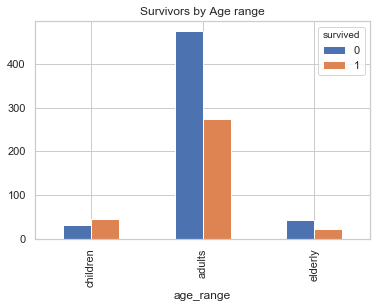

In [315]:
# Gráfico que mostra sobreviventes e não-sobreviventes por faixa etária
dftitan.groupby(['age_range', 'survived']).size().unstack().plot(kind = 'bar', title = 'Survivors by Age range')


### Pergunta 1: Conclusão

Ao analisar a tabela  e o gráfico acima, podemos verificar que a média de sobreviventes entre as crianças é bem maior em relação aos demais grupos. O resultado apresentado pode ser explicado através da [regra de evacuação](https://pt.wikipedia.org/wiki/Mulheres_e_crian%C3%A7as_primeiro) onde mulheres e crianças terão prioridade em caso de desastres. 

### Pergunta 2: A taxa de sobreviventes entre os passageiros da primeira classe foi maior?

In [316]:
# Verificando a média de sobreviventes em cada uma das classes
dftitan[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean()

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


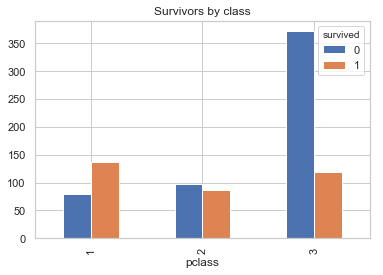

In [317]:
# Visualizando a quantidade de sobreviventes em cada uma das classes
dftitan.groupby(['pclass', 'survived']).size().unstack().plot(kind = 'bar', title = 'Survivors by class')

### Pergunta 2: Conclusão

Sim.
A taxa de sobrevivência dos passageiros da primeira classe foi de aproximadamente 63%, enquanto que na 2ª classe a taxa foi de 47% e na 3ª classe a taxa foi de 24% (conforme tabela). O gráfico acima nos mostra visualmente (através das quantidades) essa relação. Ou seja, os passageiros da primeira classe tiveram uma probabilidade de sobrevivência bem maior que os passageiros das classes inferiores.

### Pergunta 3: Qual a influência do sexo dos passageiros no número de sobreviventes?

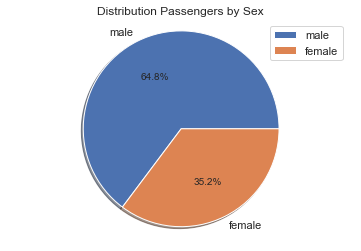

In [318]:
# Obtendo graficamente a distribuição de passageiros por sexo
fig1, ax1 = plt.subplots()
ax1.pie(dftitan['sex'].value_counts(), labels=dftitan['sex'].unique(), autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Distribution Passengers by Sex')
plt.legend()
plt.show()

In [319]:
# Obtendo média de sobreviventes por sexo
dftitan[['sex', 'survived']].groupby(['sex']).mean()

,survived
sex,
female,0.742038
male,0.188908


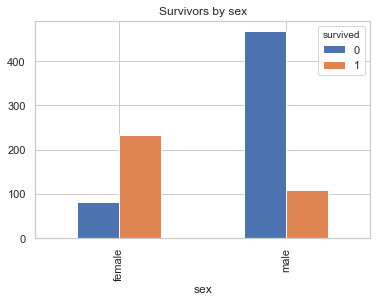

In [320]:
# Obtendo distribuição de sobreviventes por sexo
dftitan.groupby(['sex', 'survived']).size().unstack().plot(kind = 'bar', title = 'Survivors by sex')

### Pergunta 3: Conclusão

* No primeiro gráfico (distribuição da população de passageiros por sexo), podemos perceber que a quantidade de passageiros do 
  sexo masculino ("male") é bem maior que a quantidade de passageiras ("female").
* Na segunda tabela (média de sobreviventes por sexo) podemos verificar que a taxa de sobreviventes do sexo masculino 
  é bem menor (aproximadamente 19%) em relação ao sexo feminino (aproximadamente 74%). O segundo gráfico confirma os dados da 
  tabela tendo por base as quantidades de sobreviventes em cada um dos grupos ("female", "male").
  
Com isso, podemos concluir que o sexo teve uma influência significativa na população de sobreviventes. Essa influência pode ser explicada pela [regra de evacuação](https://pt.wikipedia.org/wiki/Mulheres_e_crian%C3%A7as_primeiro) citada anteriormente.

### Pergunta 4: Qual a influência do perfil financeiro dos passageiros para a sua sobrevivência?

Sabemos que a classe ("pclass") em que cada passageiro embarcou, bem como o valor da tarifa paga ("fare"), nos dá informações acerca do perfil financeiro do mesmo. Sendo assim, para responder ao questionamento acima seguirei os seguintes passos:
* Passo 1: Analisar através de dados estatísticos e gráficos a relação entre as variáveis: "fare" e "survived".
* Passo 2: Visualizar a distribuição proporcional dos sobreviventes e não-sobreviventes em cada uma das classes.
* Passo 3: Conclusões

#### Passo 1: verificar como as variáveis: "fare" e "survived" estão relacionadas.

Como "fare" é uma variável contínua, a idéia é gerar 2 grandes grupos de dados com base na media da variável "fare", e 
verificar graficamente a distribuição média dos sobreviventes em cada um dos grupos.

In [321]:
#Calculando a media do conjunto de dados com base na variável "fare"
mean_fare = dftitan['fare'].mean()

#Dividindo os dados em 2 grupos a partir da mediana
low_fare  = dftitan.query('fare <= @mean_fare')
high_fare = dftitan.query('fare > @mean_fare')

#Calculando as médias de sobreviventes em cada um dos conjuntos de dados
low_surv_mean  = low_fare['survived'].mean()
high_surv_mean = high_fare['survived'].mean()


In [322]:
#Visualizando como ficou a distribuição do conjunto de dados
low_fare.shape, high_fare.shape

((680, 8), (211, 8))

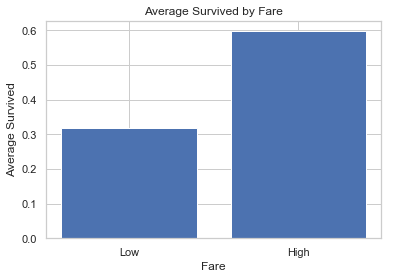

In [323]:
# Criação do gráfico de barras para contribuir ao questionamento
locations = [1, 2]
heights   = [low_surv_mean, high_surv_mean]
labels    = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Average Survived');

#### Passo 1: Conclusão

O primeiro gráfico acima nos mostra que os passageiros que pagaram pelas maiores tarifas tiveram suas chances de sobrevivência quase que duplicada em comparação com os que pagaram por tarifas mais baratas (em comparação com a média).

#### Passo 2: Visualizar a distribuição proporcional entre sobreviventes e não- sobreviventes em cada uma das classes.

In [324]:
# Obtendo as contagens de sobrevidentes para cada classe
surv_counts = dftitan.groupby(['survived', 'pclass']).count()['passengerid']
surv_counts

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: passengerid, dtype: int64

In [325]:
# Obtendo a contagem total de sobrevidentes/não sobreviventes
surv_total = dftitan.groupby(['survived']).count()['passengerid']
surv_total

survived
0    549
1    342
Name: passengerid, dtype: int64

In [326]:
# Obtendo as proporções de sobreviventes em cada uma das classes
surv_proportions = surv_counts[1] / surv_total[1]
surv_proportions

pclass
1    0.397661
2    0.254386
3    0.347953
Name: passengerid, dtype: float64

In [327]:
# Obtendo as proporções de não sobreviventes em cada uma das classes 
notsurv_proportions = surv_counts[0] / surv_total[0]
notsurv_proportions

pclass
1    0.145719
2    0.176685
3    0.677596
Name: passengerid, dtype: float64

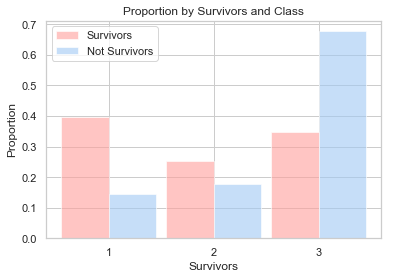

In [329]:
# Montagem das barras
ind        = np.arange(len(surv_proportions))  # a localização no eixo x dos grupos
width      = 0.45                              # a largura das barras
surv_bars  = plt.bar(ind, surv_proportions, width, color='r', alpha=.6, label='Survivors')
nsurv_bars = plt.bar(ind + width, notsurv_proportions, width, color='b', alpha=.6, label='Not Survivors')

# Definição dos título e rótulos
plt.ylabel('Proportion')
plt.xlabel('Survivors')
plt.title('Proportion by Survivors and Class')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels    = surv_proportions.index # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)

# legenda
plt.legend()

#### Passo 2: Conclusão

O gráfico acima nos mostra a distribuição de sobreviventes e não sobreviventes em cada uma das classes. Os dois extremos das classes (1st e 3rd) nos mostra claramente a influência da classe no número de sobreviventes. Enquanto que na 1st classe o número de sobreviventes foi quase o dobro, na terceira classe essa relação se inverte. Ou seja, o numero de não-sobreviventes é quase o dobro do número de sobreviventes. 

### Pergunta 4 - Conclusão

As conclusões parciais de cada uma das 2 análises acerca da pergunta 4, nos permite concluir que existe uma relação clara 
entre os sobreviventes e o seu perfil financeiro. Ou seja, um número maior de sobreviventes estão entre os que pagaram mais caro pela tarifa.

## Problemas encontrados

Algumas variáveis do conjunto de dados estavam com um número muito elevado de valores faltantes. Em alguns casos foi possivel contronar tal situação (como no caso da variável "age", onde a solução foi substituir os valores faltantes pela média). Em outros casos a solução foi a retirada completa da variável (por exemplo, a variável "cabin" que tinha cerca de 77% dos dados faltantes). 

## Resultados

Aa análise feita acerca da faixa etária dos passageiros, não nos permitiu estabeler uma relação forte entre a idade e o número de sobreviventes. A única afirmação que foi possível fazer acerca dessa análise é que na faixa etária que compreende as crianças a taxa de sobreviventes foi maior. Esse fenômeno pode ser explicado tendo como base a [regra de evacuação](https://pt.wikipedia.org/wiki/Mulheres_e_crian%C3%A7as_primeiro). Com a ajuda das análises que relacionaram as variáveis "sex"/"survived" e "pclass"/"survived", foi possível concluir uma forte relação causa/efeito. Ou seja, tanto o sexo quanto a classe dos passageiros foram fatores cruciais para a sua sobrevivência. Para corroborar a influência do perfil financeiro dos passageiros na população de sobreviventes (já confirmada pela variável "pclass"), foi realizada uma análise onde o dataset foi separado em dois grandes grupos: low_fare (contendo passageiros que pagaram valores abaixo da média) e high_fare (contendo passageiros que pagaram valores acima da média). Mais uma vez confirmamos que aqueles passageiros com maior poder aquisitivo tiveram a sua taxa de sobrevivência aumentada em relação aos demais.